# Imports

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Leitura dos dados

In [68]:
df = pd.read_json('news.json', lines=True)

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [69]:
df.count()

link                 209527
headline             209527
category             209527
short_description    209527
authors              209527
date                 209527
dtype: int64

In [70]:
df.dtypes

link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object

In [71]:
categories_list = df['category'].unique()

len(categories_list)

42

In [72]:
categories_list

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

# Tratamento da base de dados

## Remoção de duplicatas

In [73]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,link,headline,category,short_description,authors,date
67677,https://www.huffingtonpost.comhttp://www.mothe...,"On Facebook, Trump's Longtime Butler Calls For...",POLITICS,"Anthony Senecal, who worked as Donald Trump's ...",,2016-05-12
67923,https://www.huffingtonpost.comhttp://gizmodo.c...,Former Facebook Workers: We Routinely Suppress...,TECH,Facebook workers routinely suppressed news sto...,,2016-05-09
70239,https://www.huffingtonpost.comhttp://www.cnbc....,"On Equal Pay Day, The Gap Is Still Too Wide",WOMEN,Equal Pay Day falls on April 12 in 2016. It's ...,,2016-04-12
139830,https://www.huffingtonpost.comhttp://www.cnn.c...,The World's Most Dangerous Workout?,WELLNESS,"Is the ""sport of fitness"" the world's most dan...",,2014-02-10
144409,https://www.huffingtonpost.comhttp://www.upwor...,Some People Call It 'The Best Anti-Smoking Ad ...,WELLNESS,Almost all smokers know cigarettes are bad for...,,2013-12-22
145142,https://www.huffingtonpost.comhttp://www.weath...,10 Cities That Could Run Out Of Water - Weathe...,ENVIRONMENT,"Securing access to plentiful, renewable source...",,2013-12-15
178155,https://www.huffingtonpost.comhttp://www.busin...,Google Is Attacking Apple From The Inside Out ...,TECH,After years of hammering away at Apple's share...,,2013-01-01
187329,https://www.huffingtonpost.comhttp://www.nytim...,"Eating For Health, Not Weight",WELLNESS,Almost half of Americans are on a diet -- not ...,,2012-09-23
194596,https://www.huffingtonpost.comhttp://blogs.wsj...,Apple Removes Green EPEAT Electronics Certific...,TECH,Apple has pulled its products off the U.S. gov...,,2012-07-07
194598,https://www.huffingtonpost.comhttp://www.theda...,Microsoft's $6.2 Billion Writedown Shows It's ...,TECH,Fighting for online advertising dominance with...,,2012-07-07


In [74]:
df = df.drop_duplicates()

In [75]:
df.count()

link                 209514
headline             209514
category             209514
short_description    209514
authors              209514
date                 209514
dtype: int64

## Células vazias

In [76]:
df.isnull().any().any()

False

# Categorias

In [77]:
categories_count = df['category'].value_counts()
categories_count

category
POLITICS          35601
WELLNESS          17942
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9811
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3571
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2100
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1443
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

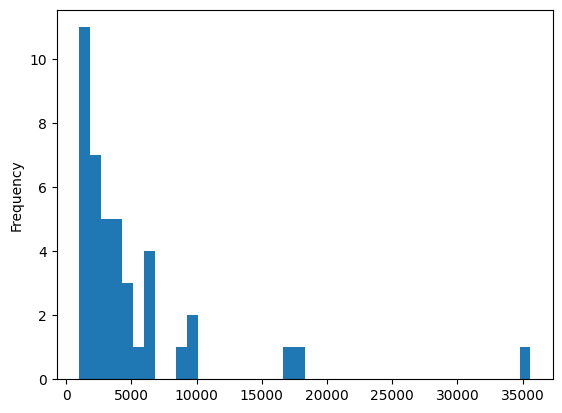

In [78]:
ax = categories_count.plot.hist(bins=42)

# Tratamento em nível de tokens

## Tokenização

In [79]:
raw = df['short_description'].iloc[0]
raw

'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.'

In [80]:
tokens = word_tokenize(raw, preserve_line=True)
tokens

['Health',
 'experts',
 'said',
 'it',
 'is',
 'too',
 'early',
 'to',
 'predict',
 'whether',
 'demand',
 'would',
 'match',
 'up',
 'with',
 'the',
 '171',
 'million',
 'doses',
 'of',
 'the',
 'new',
 'boosters',
 'the',
 'U.S.',
 'ordered',
 'for',
 'the',
 'fall',
 '.']

### Minúsculo

In [81]:
lowered_tokens = [token.lower() for token in tokens]
lowered_tokens

['health',
 'experts',
 'said',
 'it',
 'is',
 'too',
 'early',
 'to',
 'predict',
 'whether',
 'demand',
 'would',
 'match',
 'up',
 'with',
 'the',
 '171',
 'million',
 'doses',
 'of',
 'the',
 'new',
 'boosters',
 'the',
 'u.s.',
 'ordered',
 'for',
 'the',
 'fall',
 '.']

## Remoção de números e sinais de pontuação

In [82]:
words = [token for token in lowered_tokens if token.isalpha()]
words

['health',
 'experts',
 'said',
 'it',
 'is',
 'too',
 'early',
 'to',
 'predict',
 'whether',
 'demand',
 'would',
 'match',
 'up',
 'with',
 'the',
 'million',
 'doses',
 'of',
 'the',
 'new',
 'boosters',
 'the',
 'ordered',
 'for',
 'the',
 'fall']

## Remoção de Stopwords

In [83]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [85]:
no_stopwords_tokens = [word for word in words if word not in stopwords.words("english")]
no_stopwords_tokens

['health',
 'experts',
 'said',
 'early',
 'predict',
 'whether',
 'demand',
 'would',
 'match',
 'million',
 'doses',
 'new',
 'boosters',
 'ordered',
 'fall']

## Lematização

In [86]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
wnl = nltk.WordNetLemmatizer()

lemmatized_tokens = [wnl.lemmatize(token) for token in tokens]
lemmatized_tokens

['Health',
 'expert',
 'said',
 'it',
 'is',
 'too',
 'early',
 'to',
 'predict',
 'whether',
 'demand',
 'would',
 'match',
 'up',
 'with',
 'the',
 '171',
 'million',
 'dos',
 'of',
 'the',
 'new',
 'booster',
 'the',
 'U.S.',
 'ordered',
 'for',
 'the',
 'fall',
 '.']

## Stemming

In [88]:
porter = nltk.PorterStemmer()

steamed_tokens = [porter.stem(token) for token in tokens]
steamed_tokens

['health',
 'expert',
 'said',
 'it',
 'is',
 'too',
 'earli',
 'to',
 'predict',
 'whether',
 'demand',
 'would',
 'match',
 'up',
 'with',
 'the',
 '171',
 'million',
 'dose',
 'of',
 'the',
 'new',
 'booster',
 'the',
 'u.s.',
 'order',
 'for',
 'the',
 'fall',
 '.']

## Função de tratamento

In [89]:
def tokenize_text(text):
    # Tokenização
    tokens = word_tokenize(text, preserve_line=True)

    return tokens

def lower_tokens(tokens):
    # Conversão para minúsculas
    tokens = [token.lower() for token in tokens]

    return tokens

def concatenate_tokens(tokens):
    # Concatenando tokens separados por espaços
    tokens_as_text = ' '.join(tokens)

    return tokens_as_text

def remove_not_words(tokens):
    # Remoção de tokens que não são palavras (somente caracteres alfabéticos)
    words = [token for token in tokens if token.isalpha()]

    return words

def remove_stop_words(tokens):
    # Remoção de stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [token for token in tokens if token not in stop_words]

    return filtered_words

def lemmatize_tokens(tokens):
    wnl = nltk.WordNetLemmatizer()

    lemmatized_tokens = [wnl.lemmatize(token) for token in tokens]

    return lemmatized_tokens

def stemming_tokens(tokens):
    # Stemming
    porter = nltk.PorterStemmer()

    steamed_tokens = []

    for token in tokens:
        steamed_token = porter.stem(token)

        if steamed_token.str.len() > 2:
            steamed_tokens.append(steamed_token)

    return steamed_tokens

In [90]:
def process_text(text):
    tokens = tokenize_text(text)
    tokens = remove_not_words(tokens)
    tokens = lower_tokens(tokens)
    tokens = remove_stop_words(tokens)
    tokens = stemming_tokens(tokens)

    return concatenate_tokens(tokens)

In [91]:
process_text(raw)

'health expert said earli predict whether demand would match million dose new booster order fall'

## Metadados

In [92]:
def count_words(all_text_tokens):
    return sum(len(tokens) for tokens in all_text_tokens)

def count_distinct_words(all_text_tokens):
    distinct_tokens = set(token for tokens in all_text_tokens for token in tokens)

    return len(distinct_tokens)

## Tratamento de todos os documentos

### Etapas

1. Tokenização, remoção de números/pontuação e transformação para minúsculo
2. Remoção de stopwords
3. Aplicação do Stemming

### Casos

1. Título
2. Resumo
3. Título + Resumo

In [93]:
def tokenize_all_texts(df, columns):
    all_texts_tokens = []

    for index, instance in df.iterrows():
        instance_tokens = []

        for column in columns:
            text = instance[column]
            tokens = tokenize_text(text)

            tokens = remove_not_words(tokens)
            tokens = lower_tokens(tokens)

            instance_tokens = instance_tokens + tokens

        all_texts_tokens.append(instance_tokens)
    
    return all_texts_tokens

### Caso 1 (Título)

#### Tokenização e filtragem de palavras

In [94]:
columns = ['headline']

all_texts_tokens_1 = tokenize_all_texts(df, columns)

total_words = count_words(all_texts_tokens_1)
distinct_words = count_distinct_words(all_texts_tokens_1)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 1913746
Total de palavras distintas: 53778


#### Remoção de stopwords

In [95]:
for i in range(len(all_texts_tokens_1)):
    all_texts_tokens_1[i] = remove_stop_words(all_texts_tokens_1[i])

total_words = count_words(all_texts_tokens_1)
distinct_words = count_distinct_words(all_texts_tokens_1)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 1314265
Total de palavras distintas: 53630


#### Stemming

In [96]:
for i in range(len(all_texts_tokens_1)):
    all_texts_tokens_1[i] = stemming_tokens(all_texts_tokens_1[i])

total_words = count_words(all_texts_tokens_1)
distinct_words = count_distinct_words(all_texts_tokens_1)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 1314265
Total de palavras distintas: 37481


### Caso 2 (Resumo)

#### Tokenização e filtragem de palavras

In [97]:
columns = ['short_description']
all_texts_tokens_2 = tokenize_all_texts(df, columns)

total_words = count_words(all_texts_tokens_2)
distinct_words = count_distinct_words(all_texts_tokens_2)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 3956387
Total de palavras distintas: 71281


#### Remoção de stopwords

In [98]:
for i in range(len(all_texts_tokens_2)):
    all_texts_tokens_2[i] = remove_stop_words(all_texts_tokens_2[i])

total_words = count_words(all_texts_tokens_2)
distinct_words = count_distinct_words(all_texts_tokens_2)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 2101598
Total de palavras distintas: 71130


#### Stemming

In [99]:
for i in range(len(all_texts_tokens_2)):
    all_texts_tokens_2[i] = stemming_tokens(all_texts_tokens_2[i])

total_words = count_words(all_texts_tokens_2)
distinct_words = count_distinct_words(all_texts_tokens_2)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 2101598
Total de palavras distintas: 49240


### Caso 3 (Título + Resumo)

#### Tokenização e filtragem de palavras

In [100]:
columns = ['short_description', 'headline']
all_texts_tokens_3 = tokenize_all_texts(df, columns)

total_words = count_words(all_texts_tokens_3)
distinct_words = count_distinct_words(all_texts_tokens_3)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 5870133
Total de palavras distintas: 83309


#### Remoção de stopwords

In [101]:
for i in range(len(all_texts_tokens_3)):
    all_texts_tokens_3[i] = remove_stop_words(all_texts_tokens_3[i])

total_words = count_words(all_texts_tokens_3)
distinct_words = count_distinct_words(all_texts_tokens_3)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 3415863
Total de palavras distintas: 83158


#### Stemming

In [102]:
for i in range(len(all_texts_tokens_3)):
    all_texts_tokens_3[i] = stemming_tokens(all_texts_tokens_3[i])

total_words = count_words(all_texts_tokens_3)
distinct_words = count_distinct_words(all_texts_tokens_3)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 3415863
Total de palavras distintas: 58066


### Concatenar todos os tokens

In [106]:
all_texts_tokens_1 = [concatenate_tokens(tokens) for tokens in all_texts_tokens_1]
all_texts_tokens_2 = [concatenate_tokens(tokens) for tokens in all_texts_tokens_2]
all_texts_tokens_3 = [concatenate_tokens(tokens) for tokens in all_texts_tokens_3]

### Armazenamento de todos os tokens

In [107]:
df_tokens = pd.DataFrame({
    'headline': all_texts_tokens_1,
    'short_description': all_texts_tokens_2,
    'mix': all_texts_tokens_3,
    'category': df['category']})

df_tokens.to_csv('news_tokens.csv', index=False)

# Vetorização dos documentos

## Seleção de instâncias

## Por frequência

In [108]:
frequency_vectorizer = CountVectorizer()

frequency_vecs_1 = frequency_vectorizer.fit_transform(all_texts_tokens_1)
frequency_vecs_2 = frequency_vectorizer.fit_transform(all_texts_tokens_2)
frequency_vecs_3 = frequency_vectorizer.fit_transform(all_texts_tokens_3)

print(frequency_vecs_1.shape)
print(frequency_vecs_2.shape)
print(frequency_vecs_3.shape)

(209514, 37457)
(209514, 49214)
(209514, 58038)


### Armazenando com numpy

In [109]:
np.savez_compressed('frenquency_vectors.npz', 
        headline=frequency_vecs_1, 
        short_description=frequency_vecs_2, 
        mix=frequency_vecs_3, 
        category=df['category'])

## Por frequência inversa

In [110]:
inverse_frequency_vectorizer = TfidfVectorizer()

inverse_frequency_vecs_1 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_1)
inverse_frequency_vecs_2 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_2)
inverse_frequency_vecs_3 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_3)

print(inverse_frequency_vecs_1.shape)
print(inverse_frequency_vecs_2.shape)
print(inverse_frequency_vecs_3.shape)

(209514, 37457)
(209514, 49214)
(209514, 58038)


### Armazenando com numpy

In [111]:
np.savez_compressed('inverse_frenquency_vectors.npz',
        headline=inverse_frequency_vecs_1, 
        short_description=inverse_frequency_vecs_2, 
        mix=inverse_frequency_vecs_3, 
        category=df['category'])